In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [2]:
def _linear(x, a, b):
    return a*x + b

def nan_to_zero(x): 
    result = np.copy(x)
    result[np.isnan(x)] = 0
    return result


In [3]:
data = np.load("results2.npz", allow_pickle=True)['arr_0'].tolist()
run_systems = np.load("../data/compact_systems_run_composite.npy", allow_pickle=True)


In [5]:
names = np.array([run_systems[i]["name"] for i in range(len(run_systems))])
m_star = np.array([run_systems[i]["st_mass"] for i in range(len(run_systems))])

ratio = np.array([run_systems[i]["ratio"] for i in range(len(run_systems))])
survival_rate = np.array([data["bin_inj"][name]["survival_frac"] for name in names])
survival_rate = np.array([data["bin_inj"][name]["survival_frac"] for name in names])

muliplicity =  np.array([len(run_systems[i]["a"]) for i in range(len(run_systems))])
gap_size = np.array([run_systems[i]["gap"][1]/run_systems[i]["gap"][0] for i in range(len(run_systems))])
mass_std = np.array([np.std(run_systems[i]["mass"]) for i in range(len(run_systems))])
ecc_avg = np.array([np.mean(nan_to_zero(run_systems[i]["e"])) for i in range(len(run_systems))])


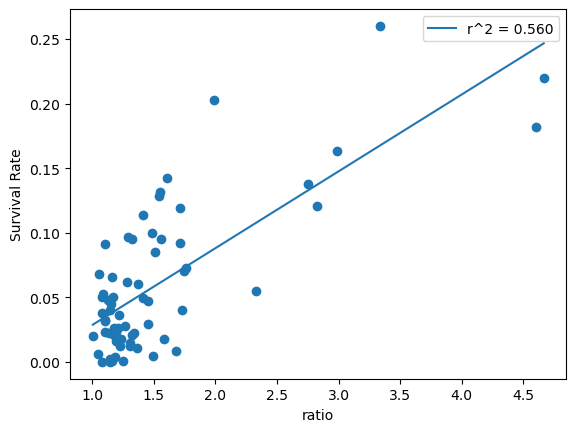

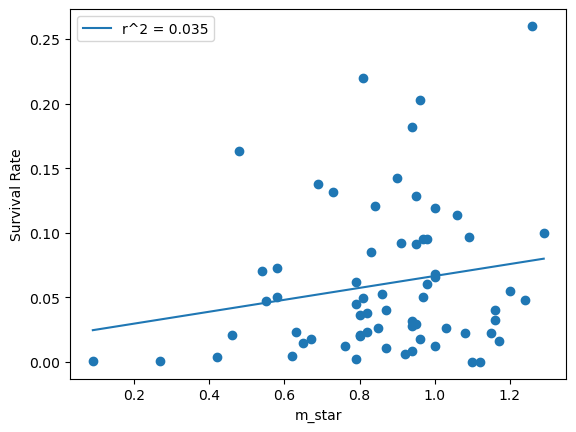

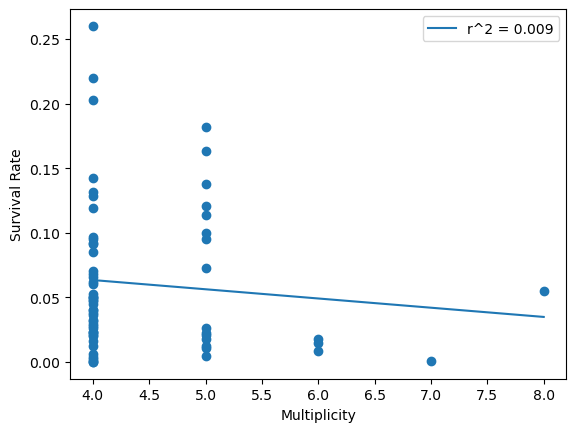

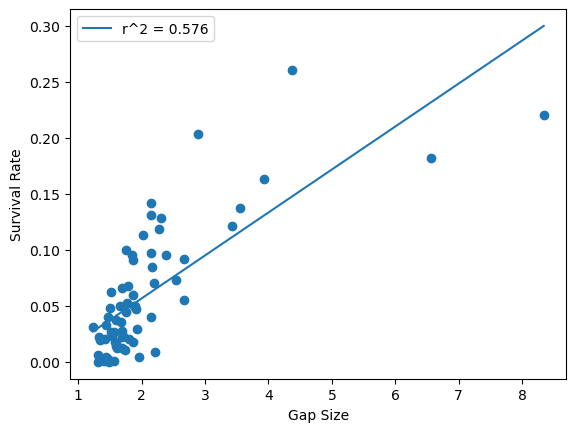

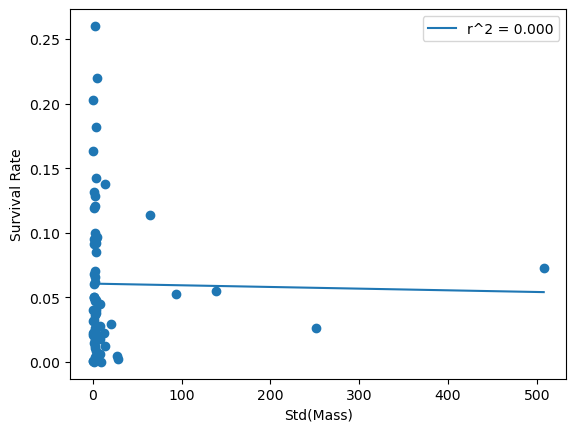

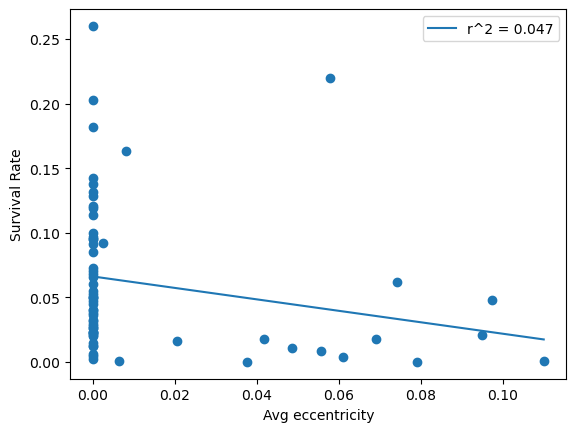

In [6]:
vars = [ratio, m_star, muliplicity, gap_size, mass_std, ecc_avg]
var_labs = ["ratio",  "m_star", "Multiplicity", "Gap Size", "Std(Mass)", "Avg eccentricity"]
for i in range(len(vars)):
    mask = survival_rate > -1
    var = vars[i][mask]
    [a, b], corr = curve_fit(_linear, var, survival_rate[mask])
    slope, intercept, r_value, p_value, std_err = stats.linregress(var, survival_rate[mask])
    
    xs = np.linspace(np.min(var), np.max(var), 10)

    plt.scatter(var, survival_rate[mask])
    plt.plot(xs, _linear(xs, a, b), label=f"r^2 = {r_value**2:.3f}")

    plt.xlabel(var_labs[i])
    plt.ylabel("Survival Rate")
    plt.legend()
    plt.show()

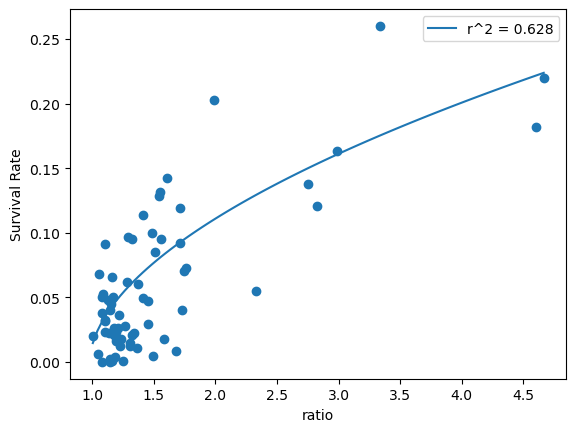

In [22]:
n = 1.83


var = ratio
[a, b], corr = curve_fit(_linear, var, survival_rate**n)
slope, intercept, r_value, p_value, std_err = stats.linregress(var, survival_rate**n)

xs = np.linspace(np.min(var), np.max(var), 100)

plt.scatter(var, survival_rate)
plt.plot(xs, (_linear(xs, a, b))**(1/n), label=f"r^2 = {r_value**2:.3f}")

plt.xlabel("ratio")
plt.ylabel("Survival Rate")
plt.legend()
plt.show()

1.0041359636079261